In [4]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy.stats import mode
from sklearn import linear_model
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
import sklearn as sk
import sklearn.discriminant_analysis as da
import sklearn.neighbors as knn
from IPython.display import Markdown, display
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer as Imputer
from sklearn.linear_model import LinearRegression



In [5]:
df = pd.read_csv('test/listings.csv')


In [6]:
df['price'] = df['price'].replace('[\$,)]','', regex=True).replace('[(]','-', regex=True).astype(float)
df['log_price'] = np.log(df['price'].values)
display(df.head())
df.columns


<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\meetv\AppData\Local\Temp\ipykernel_21912\3967479133.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,)]','', regex=True).replace('[(]','-', regex=True).astype(float)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price
0,2818.0,https://www.airbnb.com/rooms/2818,2.025030e+13,03-03-2025,city scrape,Quiet Garden View Room & Super Fast Wi-Fi,Quiet Garden View Room & Super Fast Wi-Fi,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,...,4.73,4.80,0363 5F3A 5684 6750 D14D,f,1,0,1,0,2.05,4.189655
1,27886.0,https://www.airbnb.com/rooms/27886,2.025030e+13,03-03-2025,previous scrape,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,...,4.89,4.77,0363 974D 4986 7411 88D8,f,1,0,1,0,1.84,NaN
2,28871.0,https://www.airbnb.com/rooms/28871,2.025030e+13,03-03-2025,city scrape,Comfortable double room,Basic bedroom in the center of Amsterdam.,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,...,4.94,4.83,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,3.83,4.317488
3,29051.0,https://www.airbnb.com/rooms/29051,2.025030e+13,03-03-2025,city scrape,Comfortable single room,This room can also be rented as a single or a ...,the street is quite lively especially on weeke...,https://a0.muscache.com/pictures/162009/bd6be2...,124245,...,4.87,4.79,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,4.67,4.077537
4,44391.0,https://www.airbnb.com/rooms/44391,2.025030e+13,03-03-2025,previous scrape,Quiet 2-bedroom Amsterdam city centre apartment,Guests greatly appreciate the unique location ...,The appartment is located in the city centre. ...,https://a0.muscache.com/pictures/97741545/3900...,194779,...,4.68,4.50,0363 E76E F06A C1DD 172C,f,1,1,0,0,0.24,NaN


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

Looks like a normal distribution

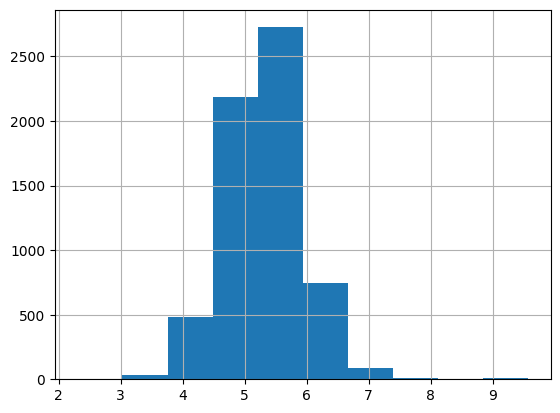

In [7]:
#Lets plot a histogram of the log(price) 
df.log_price.hist()
Markdown('Looks like a normal distribution')


In [8]:
not_interesting_cols = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 
    'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 
    'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 
    'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'bathrooms_text',
    'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 
    'host_listings_count', 'host_total_listings_count', 'host_verifications', 
    'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 
    'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'calendar_updated', 
    'calendar_last_scraped', 'first_review', 'last_review', 'license','availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped', 'last_review', 'first_review']

data = df.drop(not_interesting_cols, axis=1)


In [9]:
#Replace blanks with NaNs
data = data.replace('_', np.nan)

col_analysis = []
for column in data.columns:
    numNulls = len(data[column][data[column].isnull()])
    totalLength = len(data[column])
    dict1 = {'Name':column,'DataType':data[column].dtype, 'NumberOfNulls':numNulls, 'PercentageNulls':numNulls*100.0/totalLength}
    col_analysis.append(dict1)
    
col_anal_df = pd.DataFrame(col_analysis)[['Name', 'DataType','NumberOfNulls','PercentageNulls']].sort_values(by='PercentageNulls', ascending=False)

useful_cols = col_anal_df[col_anal_df.PercentageNulls < 50.0]

print( 'List of Predictors and their respective percentages of missing values')
display(useful_cols.head(10))

for cols in data.columns.values:
    if (np.any(useful_cols.Name.values == cols) == False):
        data.drop(cols, axis=1, inplace=True)
        
data.head(5)



List of Predictors and their respective percentages of missing values


,Name,DataType,NumberOfNulls,PercentageNulls
25,estimated_revenue_l365d,float64,4214,40.137156
39,log_price,float64,4214,40.137156
9,price,float64,4214,40.137156
7,beds,float64,4201,40.013335
5,bathrooms,float64,4165,39.670445
28,review_scores_cleanliness,float64,1190,11.334413
31,review_scores_location,float64,1189,11.324888
27,review_scores_accuracy,float64,1189,11.324888
26,review_scores_rating,float64,1189,11.324888
38,reviews_per_month,float64,1189,11.324888


,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price
0,52.36435,4.94358,Private room in condo,Private room,2,1.5,1.0,2.0,"[""PH neutral and dermatologically tested body ...",66.0,...,4.98,4.73,4.80,f,1,0,1,0,2.05,4.189655
1,52.38761,4.89188,Private room in houseboat,Private room,2,NaN,1.0,NaN,"[""Heating - split type ductless system"", ""Priv...",NaN,...,4.92,4.89,4.77,f,1,0,1,0,1.84,NaN
2,52.36775,4.89092,Private room in rental unit,Private room,2,1.0,1.0,1.0,"[""Refrigerator"", ""Hangers"", ""Smoke alarm"", ""Cl...",75.0,...,4.94,4.94,4.83,f,2,0,2,0,3.83,4.317488
3,52.36584,4.89111,Private room in condo,Private room,2,1.0,1.0,1.0,"[""Refrigerator"", ""Hangers"", ""Smoke alarm"", ""Pr...",59.0,...,4.92,4.87,4.79,f,2,0,2,0,4.67,4.077537
4,52.37168,4.91471,Entire rental unit,Entire home/apt,4,NaN,2.0,NaN,"[""Private entrance"", ""Paid parking off premise...",NaN,...,4.90,4.68,4.50,f,1,1,0,0,0.24,NaN


In [10]:
#Use Mean for Real values Columns
real_value_cols = useful_cols[useful_cols.DataType == 'float64']
imp = Imputer(missing_values=np.nan, strategy='mean')
data[real_value_cols.Name.values] = imp.fit_transform(data[real_value_cols.Name.values])


#Use Highest frequency for categorical columns
categorical_value_cols = useful_cols[useful_cols.DataType == 'object'].Name.values
data[categorical_value_cols] = data[categorical_value_cols].apply(lambda x:x.fillna(x.value_counts().index[0]))

data.head()


,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price
0,52.36435,4.94358,Private room in condo,Private room,2,1.50000,1.0,2.000000,"[""PH neutral and dermatologically tested body ...",66.000000,...,4.98,4.73,4.80,f,1,0,1,0,2.05,4.189655
1,52.38761,4.89188,Private room in houseboat,Private room,2,1.24029,1.0,1.813274,"[""Heating - split type ductless system"", ""Priv...",255.887828,...,4.92,4.89,4.77,f,1,0,1,0,1.84,5.308766
2,52.36775,4.89092,Private room in rental unit,Private room,2,1.00000,1.0,1.000000,"[""Refrigerator"", ""Hangers"", ""Smoke alarm"", ""Cl...",75.000000,...,4.94,4.94,4.83,f,2,0,2,0,3.83,4.317488
3,52.36584,4.89111,Private room in condo,Private room,2,1.00000,1.0,1.000000,"[""Refrigerator"", ""Hangers"", ""Smoke alarm"", ""Pr...",59.000000,...,4.92,4.87,4.79,f,2,0,2,0,4.67,4.077537
4,52.37168,4.91471,Entire rental unit,Entire home/apt,4,1.24029,2.0,1.813274,"[""Private entrance"", ""Paid parking off premise...",255.887828,...,4.90,4.68,4.50,f,1,1,0,0,0.24,5.308766


In [11]:
data_ohe = data.copy(deep= True)

#Encode categorical variables
def encode_categorical(array):
    return preprocessing.LabelEncoder().fit_transform(array) 


categorical_value_cols = useful_cols[useful_cols.DataType == 'object'].Name.values


#Convert Categories to numbers here
data_ohe[categorical_value_cols] = data_ohe[categorical_value_cols].apply(encode_categorical)

# Apply one hot endcoing
# Leads to inferior performance and hence we disable for now
#data_ohe = pd.get_dummies(data_ohe.ix[:,:-1], columns=categorical_value_cols)

print( 'Final Dataset ready for modelling after filling in missing values, and encoding categorical variables')
data_ohe.head()


Final Dataset ready for modelling after filling in missing values, and encoding categorical variables


,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price
0,52.36435,4.94358,27,2,2,1.50000,1.0,2.000000,5371,66.000000,...,4.98,4.73,4.80,0,1,0,1,0,2.05,4.189655
1,52.38761,4.89188,35,2,2,1.24029,1.0,1.813274,4756,255.887828,...,4.92,4.89,4.77,0,1,0,1,0,1.84,5.308766
2,52.36775,4.89092,39,2,2,1.00000,1.0,1.000000,9152,75.000000,...,4.94,4.94,4.83,0,2,0,2,0,3.83,4.317488
3,52.36584,4.89111,27,2,2,1.00000,1.0,1.000000,9198,59.000000,...,4.92,4.87,4.79,0,2,0,2,0,4.67,4.077537
4,52.37168,4.91471,14,0,4,1.24029,2.0,1.813274,8352,255.887828,...,4.90,4.68,4.50,0,1,1,0,0,0.24,5.308766


In [12]:
x = data_ohe.values[:, :-1]
y = data_ohe.values[:, -1]

#response = df_filtered[['log_price']]
#predictors =  df_filtered.drop(['log_price'], axis=1)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)


In [14]:


lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


In [15]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42, n_estimators=500, max_depth=20)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [16]:


from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=42, n_estimators=200, max_depth=3, learning_rate=0.05, subsample=1, colsample_bytree=0.8)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)




In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name}")
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("R2 Score:", r2_score(y_true, y_pred))
    print("-" * 30)

# Evaluate each model
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")

Linear Regression
RMSE: 0.28949425945967333
MAE: 0.20613127522053862
R2 Score: 0.6380178900485839
------------------------------
Random Forest
RMSE: 0.006615861319733623
MAE: 0.0007512287306546716
R2 Score: 0.9998109485639303
------------------------------
XGBoost
RMSE: 0.05195236829097421
MAE: 0.016632400820641595
R2 Score: 0.9883421652576241
------------------------------


In [18]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split


# Step 4: 5-Fold Cross Validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

cv_scores = cross_val_score(
    xgb_model, X_train, y_train,
    cv=kfold, scoring='r2'
)

print("\n--- 5-Fold Cross Validation R2 Scores ---")
print(cv_scores)
print(f"Average R2 Score across folds: {np.mean(cv_scores)}")


--- 5-Fold Cross Validation R2 Scores ---
[0.96487307 0.99465067 0.96433214 0.99370208 0.99299954 0.97935345
 0.97706624 0.99048682 0.99566188 0.97491864]
Average R2 Score across folds: 0.982804452249289


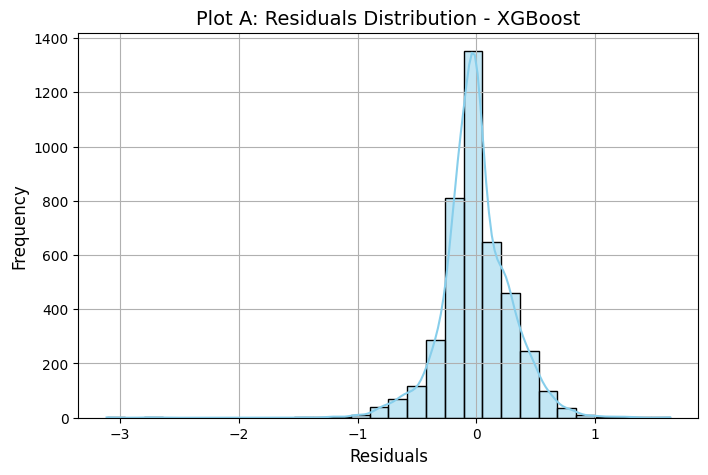

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_test = lr_model.predict(X_test)


residuals = y_test - y_pred_test

plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True, color="skyblue", bins=30)
plt.title("Plot A: Residuals Distribution - XGBoost", fontsize=14)
plt.xlabel("Residuals", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True)
plt.show()


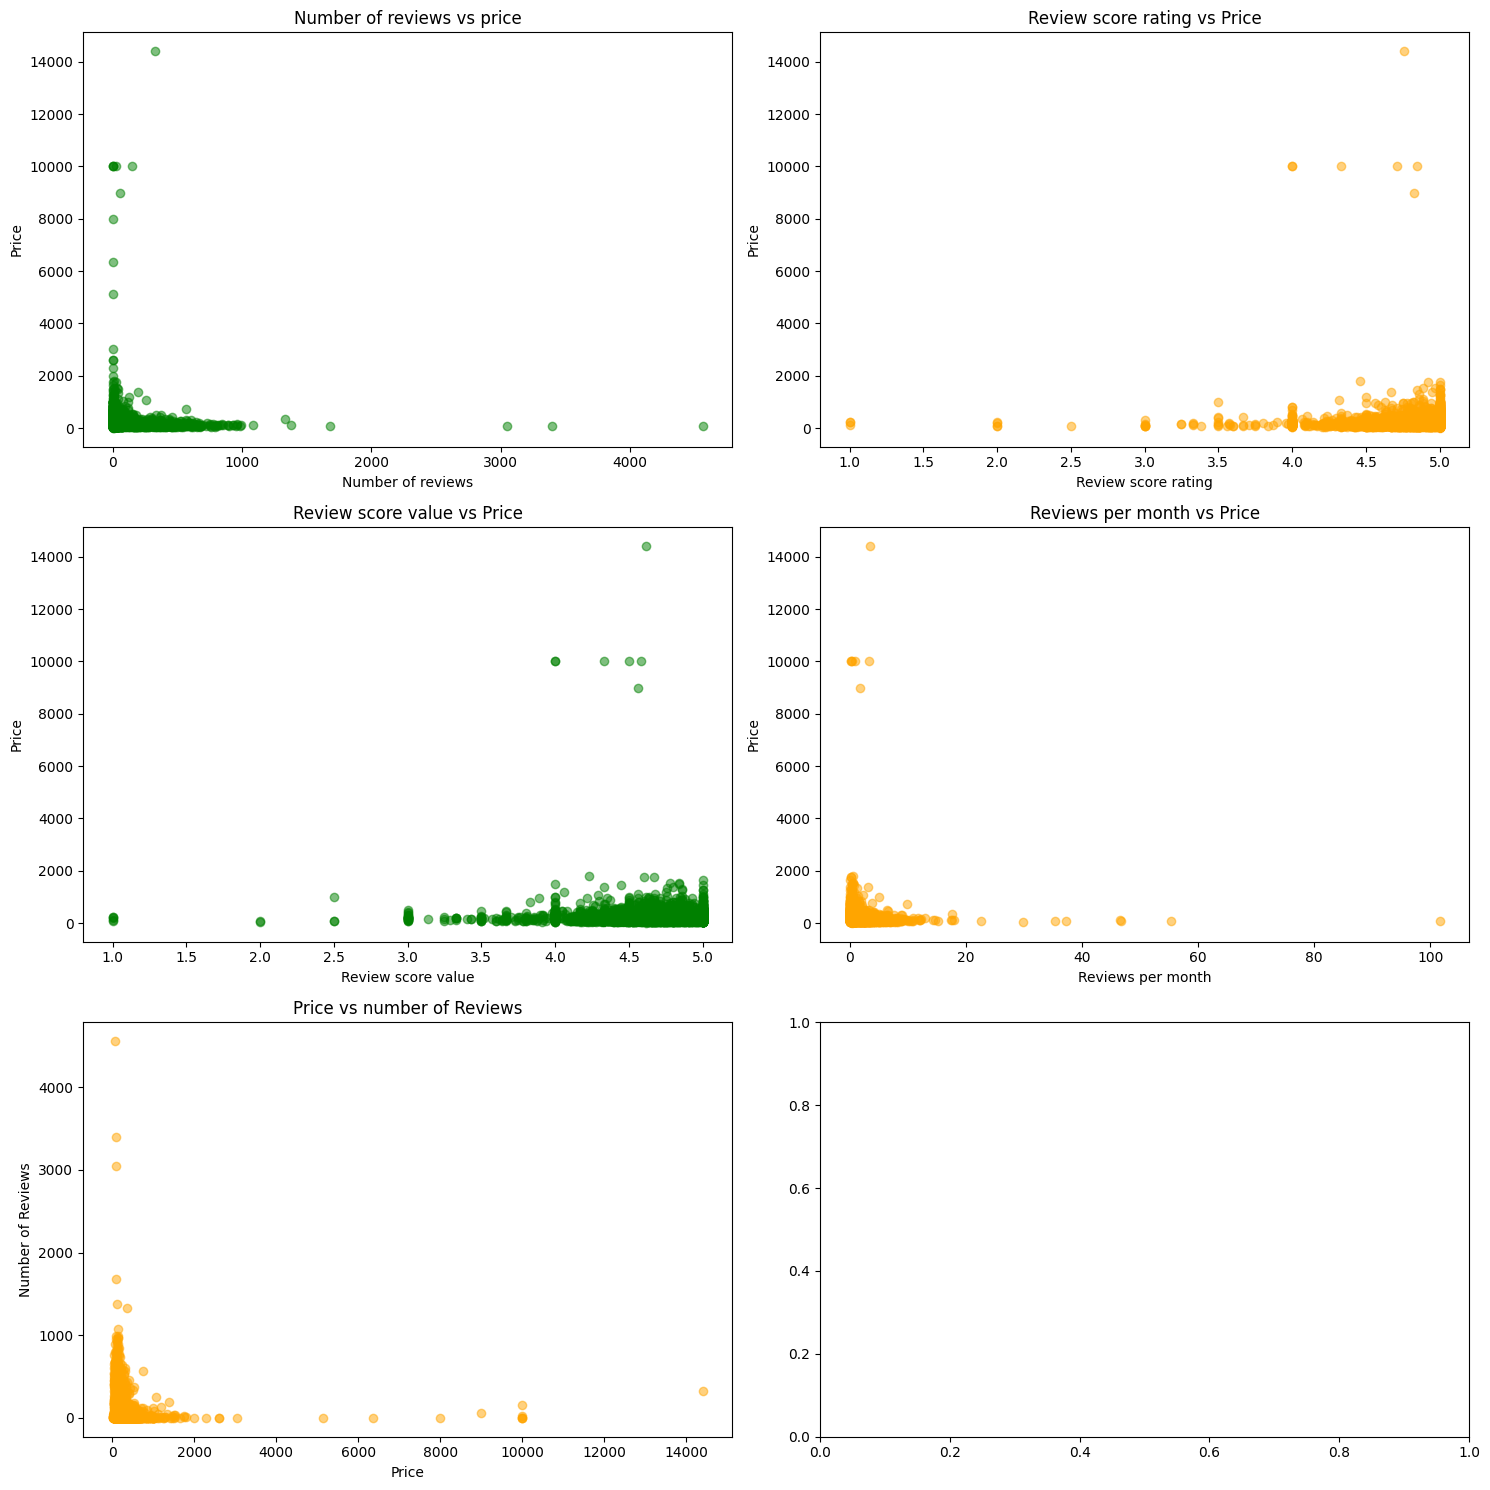

In [27]:
#function for plotting scatter plots
def plot_scatter(x,y, title, x_label, y_label, face, axes):
    
    axes.scatter(x,y,color=face,alpha=0.5)

    
    axes.set_title(title)
    axes.set_xlabel(x_label)
    axes.set_ylabel(y_label)
    
    
    
    return axes
    
#plot histograms for each marker and each demographics
#in the following, instead of adding one subplot to a 4x2 grid at a time
#I can get all the subplot axes for the grid in one line 
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 15))
ax1 = plot_scatter(df.number_of_reviews,df.price,
                'Number of reviews vs price', 
                'Number of reviews', 'Price',
                'green', 
                ax1)

ax2 = plot_scatter(df.review_scores_rating,df.price,
                'Review score rating vs Price', 
                'Review score rating', 'Price',
                'orange', 
                ax2)

ax3 = plot_scatter(df.review_scores_value,df.price,
                'Review score value vs Price', 
                'Review score value', 'Price', 
                'green', 
                ax3)

ax4 = plot_scatter(df.reviews_per_month,df.price,
                'Reviews per month vs Price', 
                'Reviews per month', 'Price',
                'orange', 
                ax4)

ax5 = plot_scatter(df.price,df.number_of_reviews,
                'Price vs number of Reviews', 
                'Price','Number of Reviews',
                'orange', ax5)



plt.tight_layout()
plt.show()

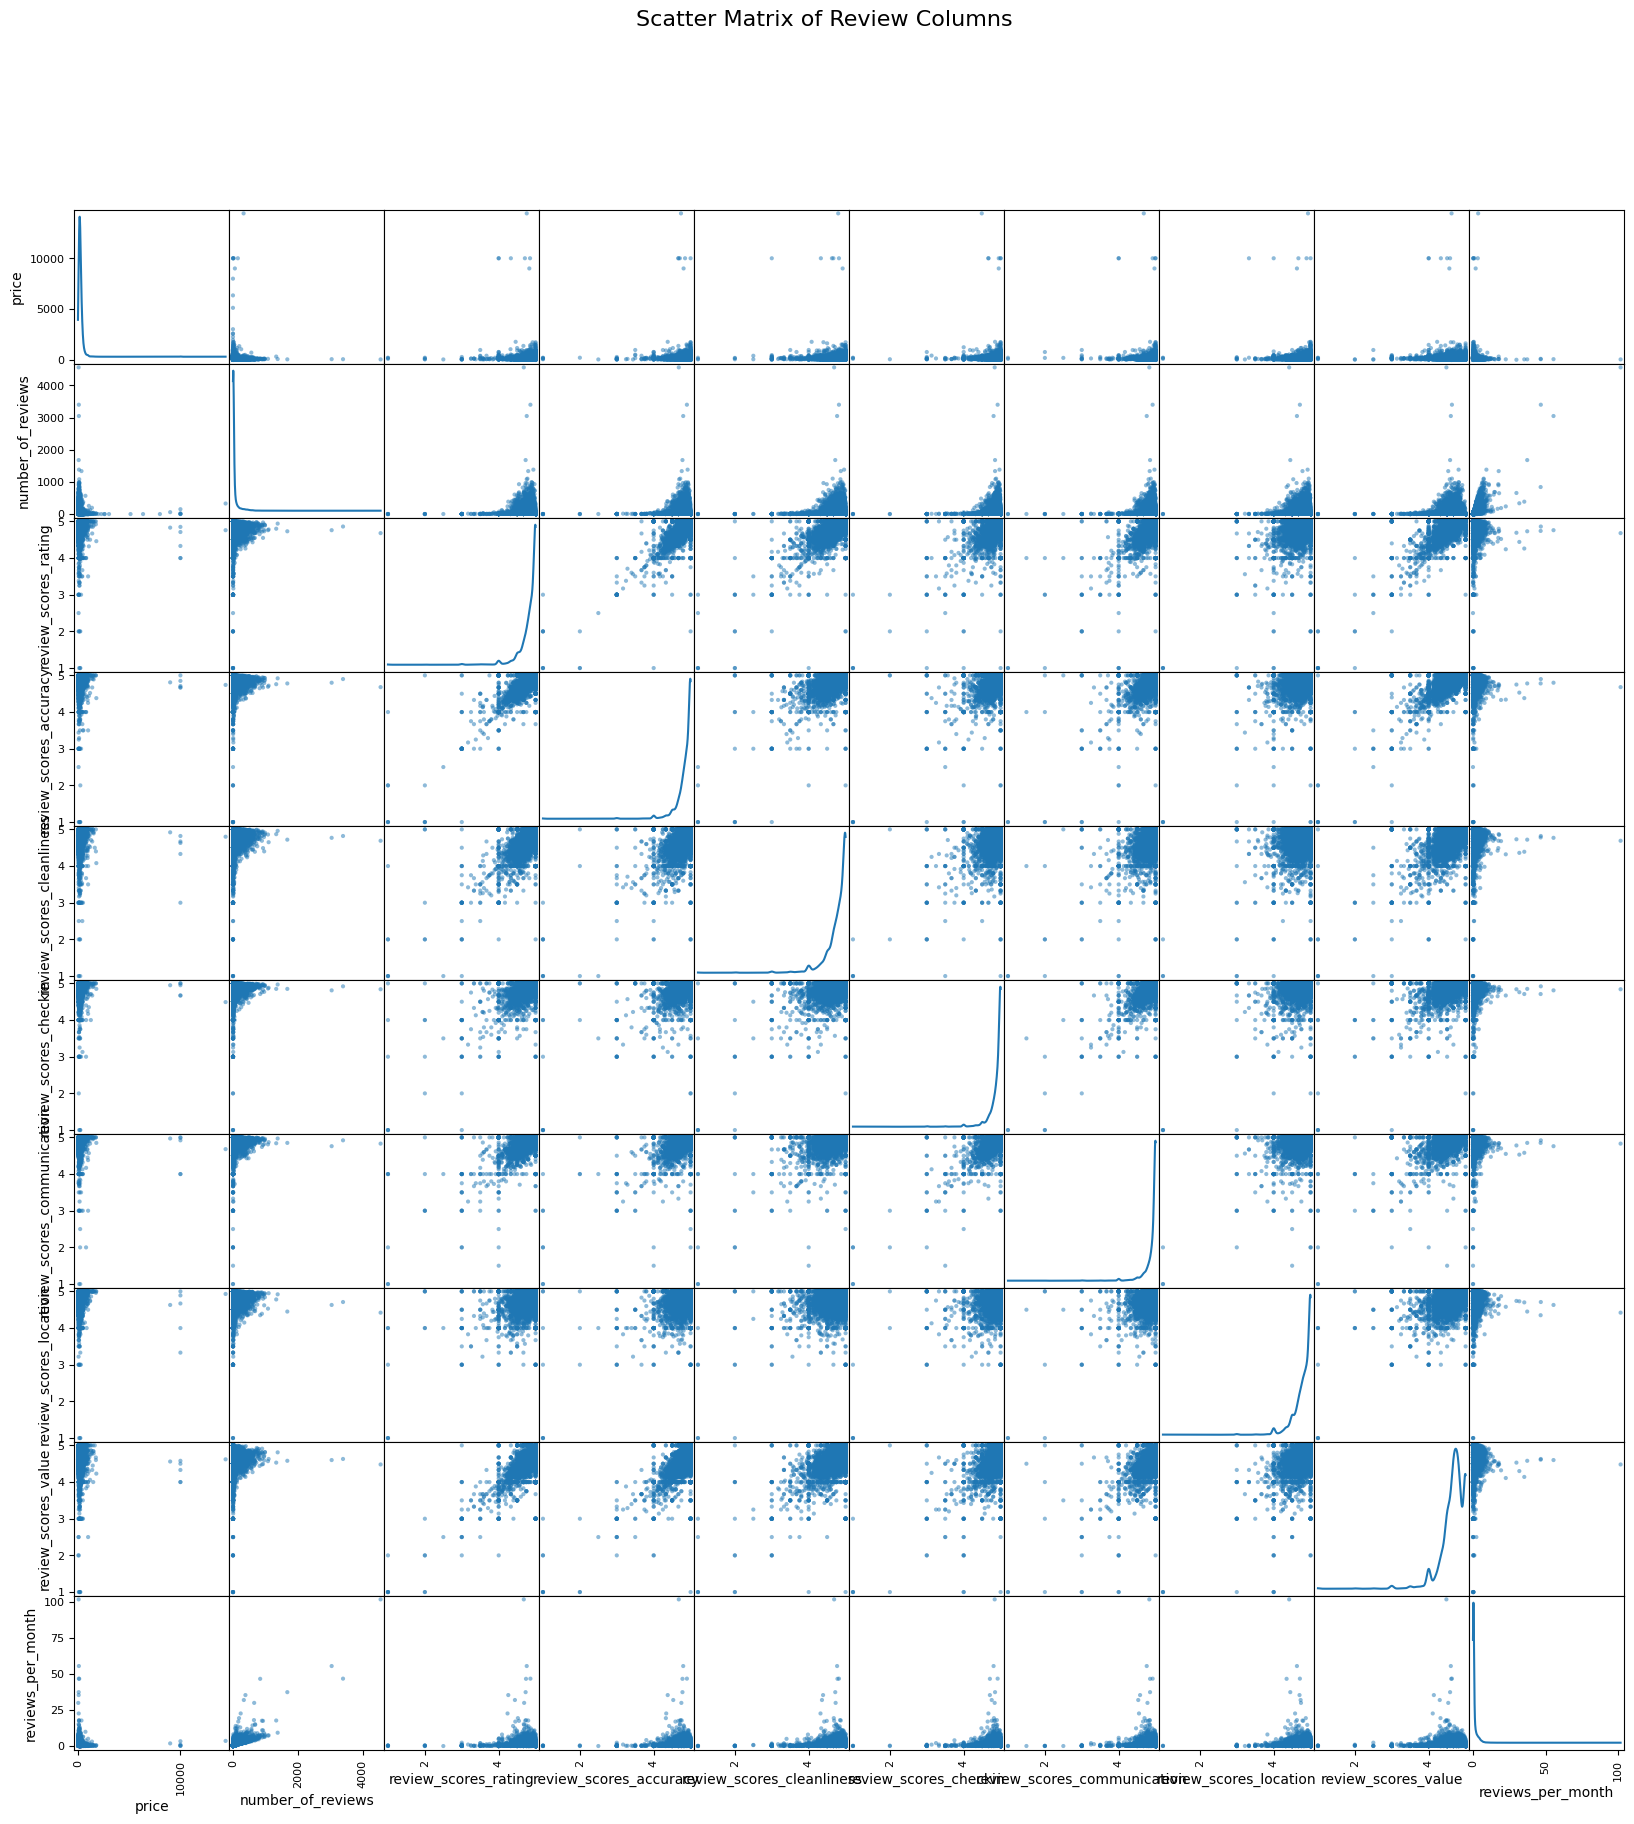

In [28]:
import pandas as pd

import matplotlib.pyplot as plt

reviews_column = ['price','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','reviews_per_month']


# Scatter matrix plot
scatter_plots = pd.plotting.scatter_matrix(
    df[reviews_column],
    figsize=(20, 20),
    diagonal='kde',
    alpha=0.5
)

plt.suptitle("Scatter Matrix of Review Columns", fontsize=16)
plt.show()


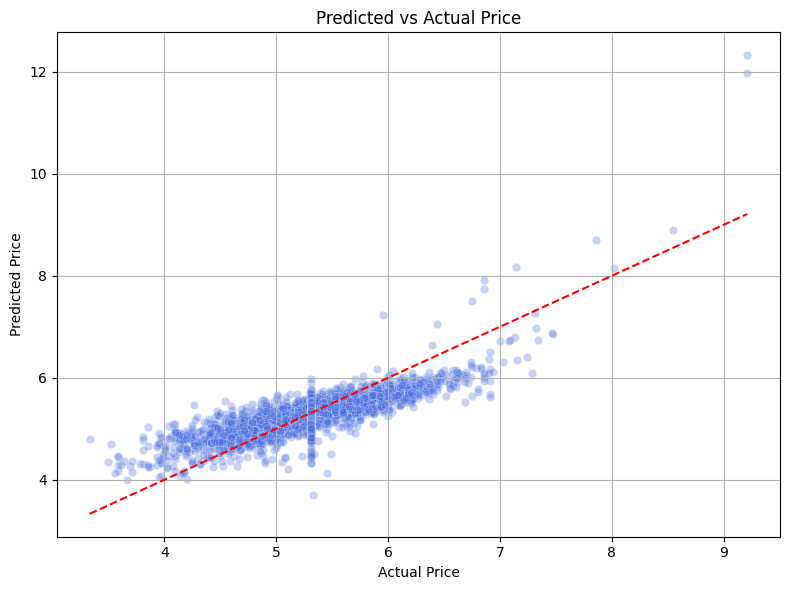

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

y_pred = lr_model.predict(X_test)


# Plot Predicted vs Actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.3, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal diagonal line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual Price")
plt.grid(True)
plt.tight_layout()
plt.show()


<Axes: title={'center': 'Reviews vs Price'}, xlabel='price'>

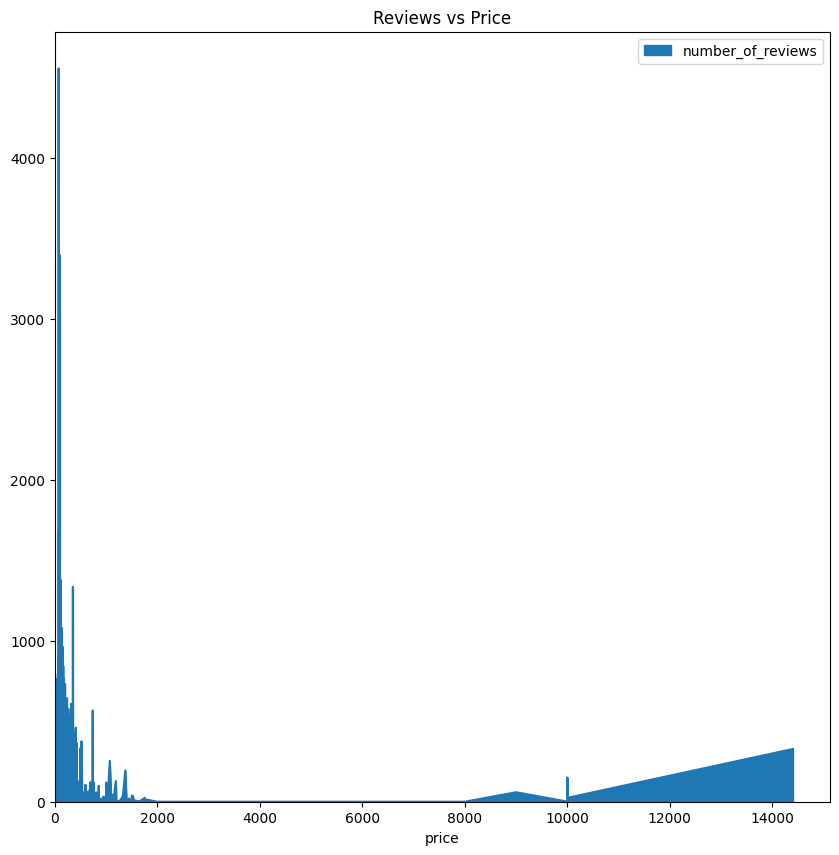

In [31]:
price_review = df[['number_of_reviews', 'price']].sort_values(by = 'price')

price_review.plot(x = 'price', y = 'number_of_reviews', figsize =(10,10), kind = 'area', title = 'Reviews vs Price', xlim=0,ylim=0)


     